In [1]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['lines.linewidth'] = 1.5

font = {'weight' : 'normal',
      'size'   : 12}

plt.rc('font', **font)

import fair
fair.__version__

'1.0.1'

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:33: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



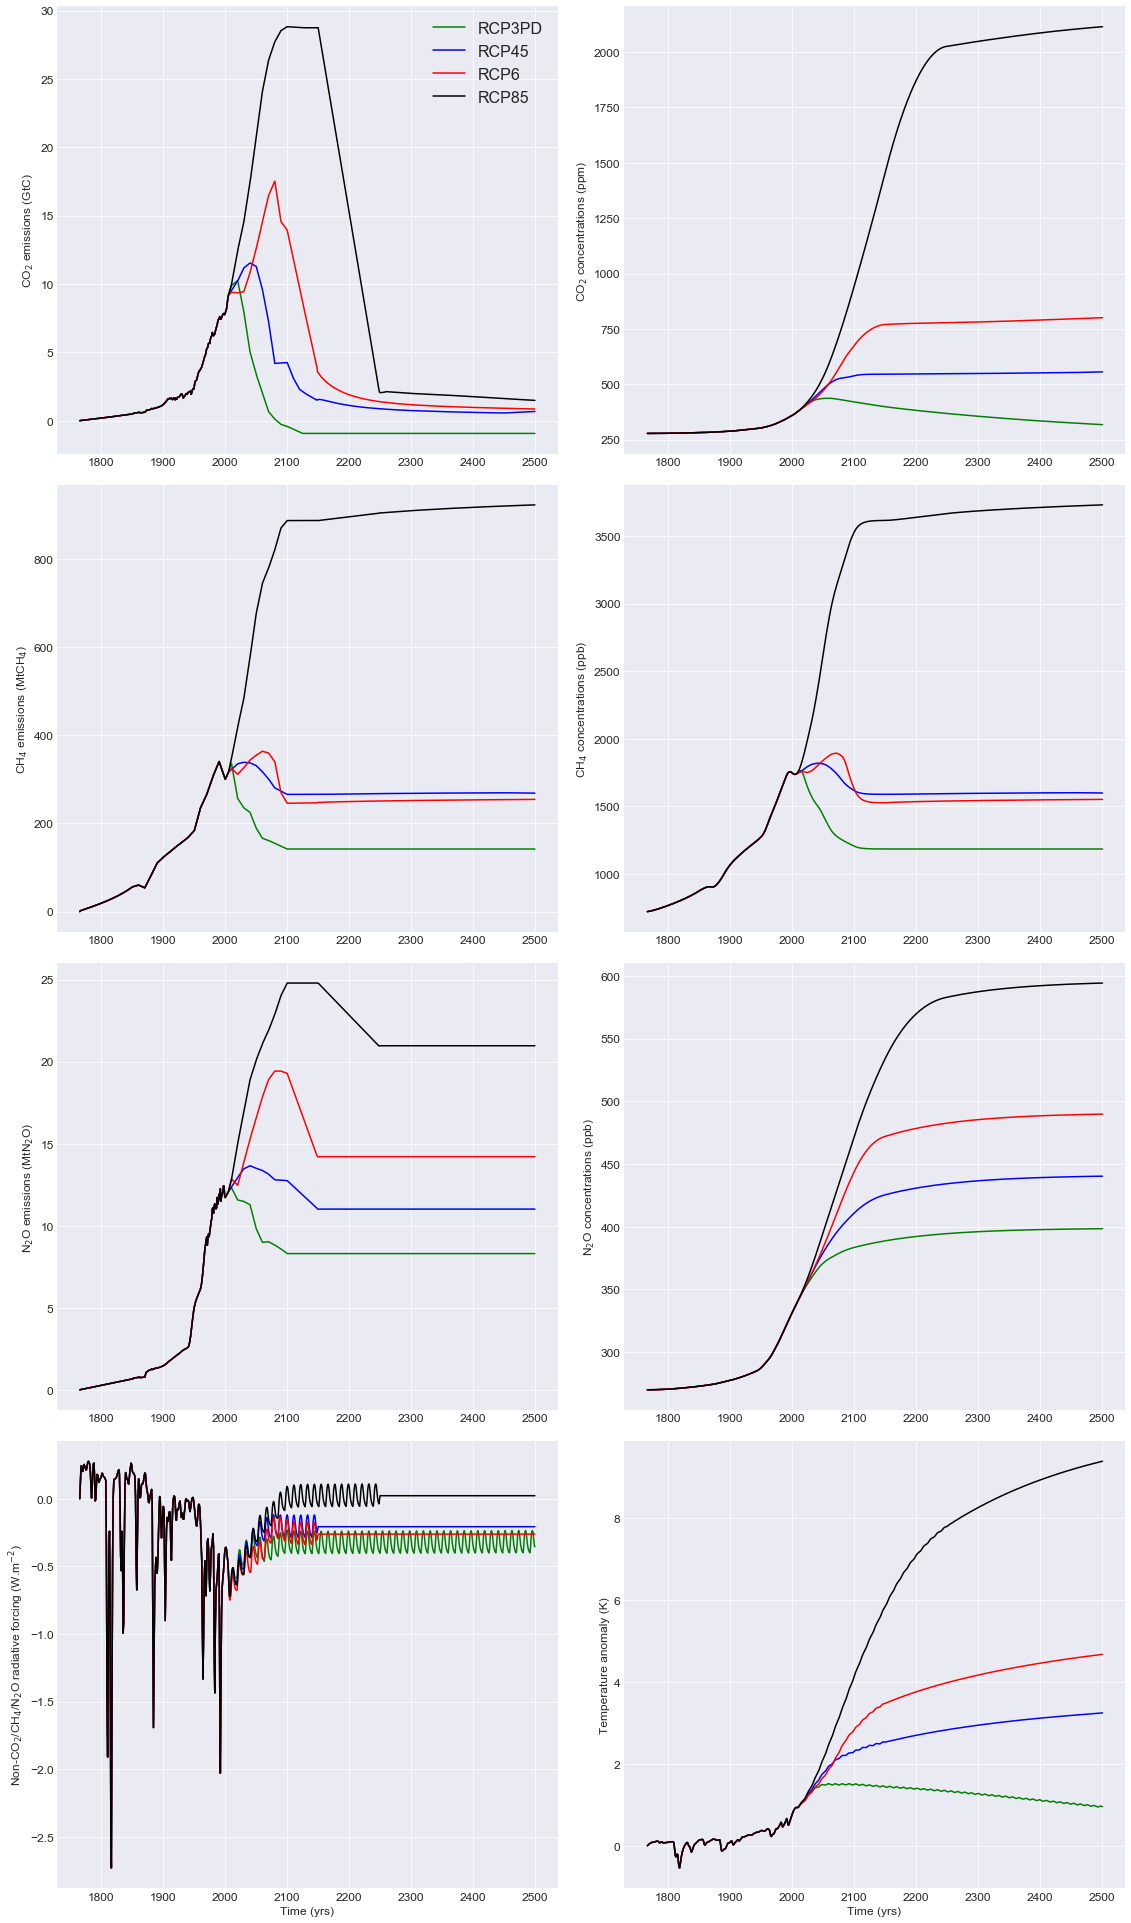

In [2]:
fig = plt.figure(figsize=(16,27))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)

rcps = ['RCP3PD','RCP45','RCP6','RCP85']
colours = ['green','blue','red','black']

for i,rcp in enumerate(rcps):
    emms_file = './fair/RCPs/' + rcp + '_EMISSIONS.csv'
    emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)
    emissions = emms_data['FossilCO2'] + emms_data['OtherCO2']
    M_emissions = emms_data['CH4']
    N_emissions = emms_data['N2O'] * 44.0 / 28.0 # In RCPs, given in MtN emissions, not MtN2O
    CFC11 = emms_data['CFC_11']
    CFC12 = emms_data['CFC_12']
    CFC113 = emms_data['CFC_113']
    HCFC22 = emms_data['HCFC_22']
    HFC134a = emms_data['HFC134a']
    CCl4 = emms_data['CARB_TET']
    MK_gas_emissions_def = [CFC11,CFC12,CFC113,HCFC22,HFC134a,CCl4]
    
    forc_file = './fair/RCPs/' + rcp + '_MIDYEAR_RADFORCING.csv'
    forc_data = np.genfromtxt(forc_file,skip_header=58,delimiter=',',names=True)
    other_rf = forc_data['TOTAL_INCLVOLCANIC_RF'] - forc_data['CO2_RF'] - forc_data['CH4_RF'] - forc_data['N2O_RF'] - forc_data['CFC_11'] - forc_data['CFC_12'] - forc_data['CFC_113'] - forc_data['HCFC_22'] - forc_data['HFC134a'] - forc_data['CARB_TET']
    
    C,T,RF,M,N,MK_gas,database = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,N_emissions=N_emissions,MK_gas_emissions_def=MK_gas_emissions_def,
                            other_rf=other_rf)
    
    fair.forward.plot_fair(emissions,M_emissions,N_emissions,
              C,M,N,
              other_rf,
              T,
              y_0=1765,
              tuts='yrs',
              infig=fig,
              inemmsax=ax1,
              inconcax=ax2,
              inM_emmsax=ax3,
              inM_concax=ax4,
              inN_emmsax=ax5,
              inN_concax=ax6,
              inforcax=ax7,
              intempax=ax8,
              colour={'emms':colours[i],
                     'conc':colours[i],
                     'forc':colours[i],
                     'temp':colours[i]},
              label=rcp
             )

In [3]:
print database['CFC-11']['concentration'][250] 
print database['CFC-12']['concentration'][250]
print database['CFC-113']['concentration'][250]
print database['HCFC-22']['concentration'][250]
print database['HFC-134a']['concentration'][250]
print database['CCl4']['concentration'][250]


0.232246639069
0.516356982116
0.0714715342098
0.232416223662
0.0835048455033
0.0821826856329


In [4]:
#GWP Computation for MK gases
from scipy.integrate import trapz as numint

emms_file = './fair/RCPs/RCP45_EMISSIONS.csv'
emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)
emissions = emms_data['FossilCO2'] + emms_data['OtherCO2']
M_emissions = emms_data['CH4']
N_emissions = emms_data['N2O'] * 44.0 / 28.0 # In RCPs, given in MtN emissions, not MtN2O
CFC11 = emms_data['CFC_11']
CFC12 = emms_data['CFC_12']
CFC113 = emms_data['CFC_113']
HCFC22 = emms_data['HCFC_22']
HFC134a = emms_data['HFC134a']
CCl4 = emms_data['CARB_TET']
MK_gas_emissions_def = [CFC11,CFC12,CFC113,HCFC22,HFC134a,CCl4]
    
forc_file = './fair/RCPs/RCP45_MIDYEAR_RADFORCING.csv'
forc_data = np.genfromtxt(forc_file,skip_header=58,delimiter=',',names=True)
other_rf = forc_data['TOTAL_INCLVOLCANIC_RF'] - forc_data['CO2_RF'] - forc_data['CH4_RF'] - forc_data['N2O_RF'] - forc_data['CFC_11'] - forc_data['CFC_12'] - forc_data['CFC_113'] - forc_data['HCFC_22'] - forc_data['HFC134a'] - forc_data['CARB_TET']

C,T,RF_un,M,N,MK_gas,db = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,N_emissions=N_emissions,MK_gas_emissions_def=MK_gas_emissions_def,
                            other_rf=other_rf)
    
emissions[250] += 1.0*10**(-6)*12.0/44.0     # 1 Kt pulse of CO2 at 2015
C,T,RFCO2,M,N,MK_gas,db = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,N_emissions=N_emissions,MK_gas_emissions_def=MK_gas_emissions_def,
                            other_rf=other_rf)
emissions[250] -= 1.0*10**(-6)*12.0/44.0

AGWP = [np.zeros(484),np.zeros(484),np.zeros(484),np.zeros(484),np.zeros(484),np.zeros(484)] # List in which to store the MK gas AGWPs
for i in range(0,6):
    MK_gas_emissions_def[i][250] += 1    # 1 Kt pulse of the other gas at 2015
    
    C,T,RF,M,N,MK_gas,db = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,N_emissions=N_emissions,MK_gas_emissions_def=MK_gas_emissions_def,
                            other_rf=other_rf)
    RF -= RF_un
    # Calculate AGWP from RF
    for ii in range(251,735):
        AGWP[i][ii-251] = numint(RF[:ii])
    
    MK_gas_emissions_def[i][250] -= 1

RFCO2 -= RF_un
AGWPCO2 = np.zeros(484)
for ii in range (251,735):  
    AGWPCO2[ii-251] = numint(RFCO2[:ii])

GWPCFC11 = AGWP[0]/AGWPCO2
GWPCFC12 = AGWP[1]/AGWPCO2
GWPCFC113 = AGWP[2]/AGWPCO2
GWPHCFC22 = AGWP[3]/AGWPCO2
GWPHFC134a = AGWP[4]/AGWPCO2
GWPCCl4 = AGWP[5]/AGWPCO2




C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:22: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:26: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:3

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


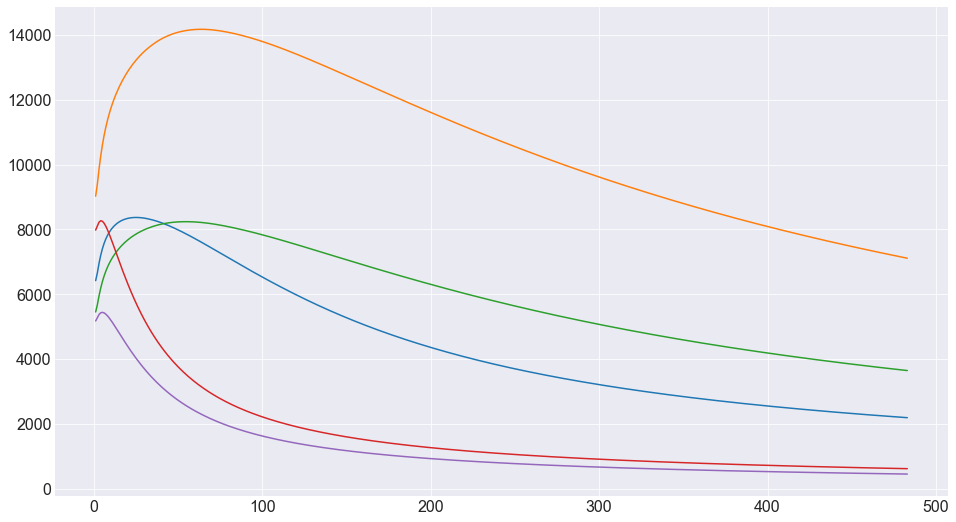

In [5]:
for i in range(0,5):
    plt.plot(AGWP[i]/AGWPCO2)

In [2]:
[emissions,M_emissions,N_emissions] = [np.zeros(250),np.zeros(250),np.zeros(250)]
#emissions[20] = 1.0/3.67
#M_emissions[20] = 10000.0
other_rf = np.zeros(emissions.size)
CFC11 = np.zeros(250)
CFC11[0] = 1000000.0
MK_gas_emissions_def = [0,CFC11,0,0,0,0]

C,T,RF,M,N,MK_gas = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,N_emissions=N_emissions,MK_gas_emissions_def=MK_gas_emissions_def,
                            other_rf=other_rf)

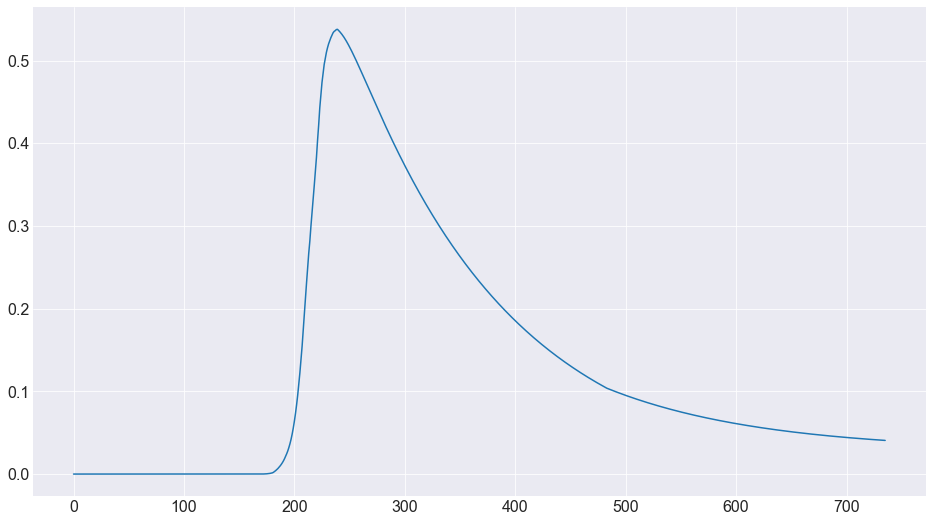

In [6]:
plt.plot(database['CFC-12']['concentration'])